In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
# df = pd.read_csv("nov2015-2021.txt", sep = ",") main df
frames = []

for x in range(2013,2021):
    frames.append(pd.read_csv(f"nov{x}-{x+1}.txt", sep = ", "))

df = pd.concat(frames)

<ipython-input-228-559dd7caaaaa>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  frames.append(pd.read_csv(f"nov{x}-{x+1}.txt", sep = ", "))


In [229]:
df

,Aeg,Temperatuur,Niiskus,&Otilde;hur&otilde;hk,Tuule kiirus,Tuule suund,Sademed,UV indeks,Valgustatus,Kiirgusvoog,Radioaktiivsus
0,2013-11-15 00:00:00,2.253725,80.280623,1012.974940,1.396552,219.132229,0.0,NaN,NaN,NaN,0.097777
1,2013-11-15 00:05:00,2.269765,80.633583,1013.042850,1.246345,220.840096,0.0,NaN,NaN,NaN,0.134524
2,2013-11-15 00:10:00,2.259058,80.844891,1012.746232,1.387465,218.213758,0.0,NaN,NaN,NaN,0.091138
3,2013-11-15 00:15:00,2.222720,80.999738,1012.925478,1.803502,224.199997,0.0,NaN,NaN,NaN,0.097796
4,2013-11-15 00:20:00,2.135194,81.082619,1012.874290,1.640076,225.130637,0.0,NaN,NaN,NaN,0.096651
...,...,...,...,...,...,...,...,...,...,...,...
107524,2021-11-14 23:35:00,-1.991186,96.350940,1034.179600,2.291164,278.719481,0.0,NaN,NaN,"0,",NaN
107525,2021-11-14 23:40:00,-2.099397,96.499085,1034.218233,2.184660,278.960231,0.0,NaN,NaN,"0,",NaN
107526,2021-11-14 23:45:00,-2.178767,96.706996,1034.270767,1.937803,287.393843,0.0,NaN,NaN,"0,",NaN
107527,2021-11-14 23:50:00,-2.188267,96.788578,1034.265867,1.899986,293.219940,0.0,NaN,NaN,"0,",NaN


In [230]:
# temperature = C, humidity %, air pressure hPa, wind speed m/s, wind direction NSEW, perc mm, W/m2
rename_list = ['time','temp','humidity','air_pressure','wind_speed','wind_direction','precipitation','uv_index',
               'illumination','radiation_flux','radioactivity']
df = df.set_axis(rename_list, axis=1)

In [231]:
#df = df.dropna(axis=1, how='all')
df = df[['time','temp','humidity','air_pressure','wind_speed','wind_direction','precipitation','radiation_flux']]

In [232]:
df['time'] = pd.to_datetime(df['time'])
#df['time'] = df['time'].apply(lambda x: x.value)
df["day_of_year"] = df['time'].map(lambda x: x.dayofyear)
#df["month"] = df['time'].map(lambda x: x.month)
df["year"] = df['time'].map(lambda x: x.year)
df["time_m"] = df['time'].map(lambda x: x.hour*60 + x.minute)

In [233]:
df = df.replace(',','', regex=True)
df

,time,temp,humidity,air_pressure,wind_speed,wind_direction,precipitation,radiation_flux,day_of_year,year,time_m
0,2013-11-15 00:00:00,2.253725,80.280623,1012.974940,1.396552,219.132229,0.0,NaN,319,2013,0
1,2013-11-15 00:05:00,2.269765,80.633583,1013.042850,1.246345,220.840096,0.0,NaN,319,2013,5
2,2013-11-15 00:10:00,2.259058,80.844891,1012.746232,1.387465,218.213758,0.0,NaN,319,2013,10
3,2013-11-15 00:15:00,2.222720,80.999738,1012.925478,1.803502,224.199997,0.0,NaN,319,2013,15
4,2013-11-15 00:20:00,2.135194,81.082619,1012.874290,1.640076,225.130637,0.0,NaN,319,2013,20
...,...,...,...,...,...,...,...,...,...,...,...
107524,2021-11-14 23:35:00,-1.991186,96.350940,1034.179600,2.291164,278.719481,0.0,0,318,2021,1415
107525,2021-11-14 23:40:00,-2.099397,96.499085,1034.218233,2.184660,278.960231,0.0,0,318,2021,1420
107526,2021-11-14 23:45:00,-2.178767,96.706996,1034.270767,1.937803,287.393843,0.0,0,318,2021,1425
107527,2021-11-14 23:50:00,-2.188267,96.788578,1034.265867,1.899986,293.219940,0.0,0,318,2021,1430


In [234]:
df.drop(columns=df.columns[0],
        axis=1,
        inplace=True)
cols = df.columns
df

,temp,humidity,air_pressure,wind_speed,wind_direction,precipitation,radiation_flux,day_of_year,year,time_m
0,2.253725,80.280623,1012.974940,1.396552,219.132229,0.0,NaN,319,2013,0
1,2.269765,80.633583,1013.042850,1.246345,220.840096,0.0,NaN,319,2013,5
2,2.259058,80.844891,1012.746232,1.387465,218.213758,0.0,NaN,319,2013,10
3,2.222720,80.999738,1012.925478,1.803502,224.199997,0.0,NaN,319,2013,15
4,2.135194,81.082619,1012.874290,1.640076,225.130637,0.0,NaN,319,2013,20
...,...,...,...,...,...,...,...,...,...,...
107524,-1.991186,96.350940,1034.179600,2.291164,278.719481,0.0,0,318,2021,1415
107525,-2.099397,96.499085,1034.218233,2.184660,278.960231,0.0,0,318,2021,1420
107526,-2.178767,96.706996,1034.270767,1.937803,287.393843,0.0,0,318,2021,1425
107527,-2.188267,96.788578,1034.265867,1.899986,293.219940,0.0,0,318,2021,1430


In [235]:
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.fillna(0)

In [236]:
df.drop(columns='year',
        axis=1,
        inplace=True)

In [237]:
df.round(2)

,temp,humidity,air_pressure,wind_speed,wind_direction,precipitation,radiation_flux,day_of_year,time_m
0,2.25,80.28,1012.97,1.40,219.13,0.0,0.0,319,0
1,2.27,80.63,1013.04,1.25,220.84,0.0,0.0,319,5
2,2.26,80.84,1012.75,1.39,218.21,0.0,0.0,319,10
3,2.22,81.00,1012.93,1.80,224.20,0.0,0.0,319,15
4,2.14,81.08,1012.87,1.64,225.13,0.0,0.0,319,20
...,...,...,...,...,...,...,...,...,...
107524,-1.99,96.35,1034.18,2.29,278.72,0.0,0.0,318,1415
107525,-2.10,96.50,1034.22,2.18,278.96,0.0,0.0,318,1420
107526,-2.18,96.71,1034.27,1.94,287.39,0.0,0.0,318,1425
107527,-2.19,96.79,1034.27,1.90,293.22,0.0,0.0,318,1430


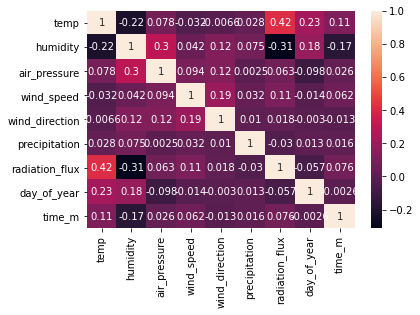

In [238]:
import seaborn as sns

import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [239]:
corr_table = df.corr()[['radiation_flux']].sort_values(by='radiation_flux', ascending=False)

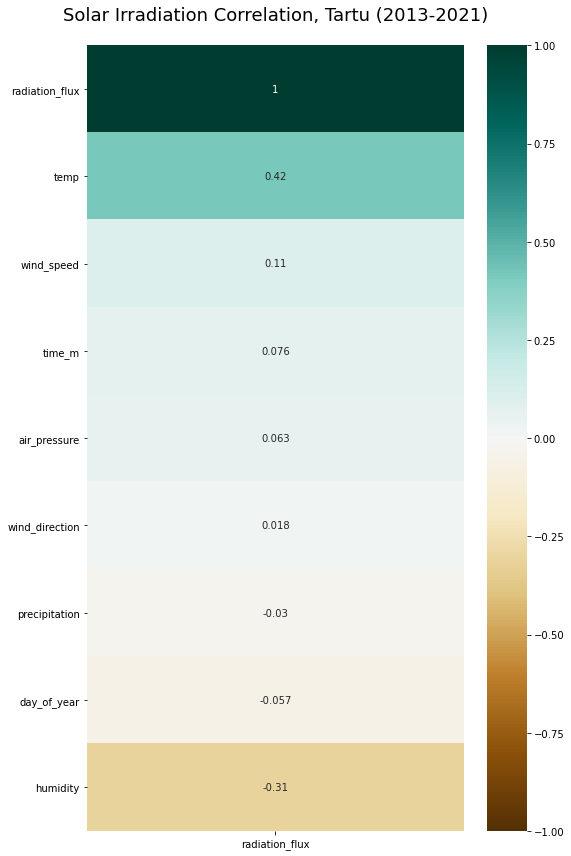

In [240]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(corr_table, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Solar Irradiation Correlation, Tartu (2013-2021)', fontdict={'fontsize':18}, pad=25)
plt.tight_layout()
plt.savefig('corr.png', dpi=300)

We are given:

$X=\{time,temperature,humidity,air\_pressure,wind\_speed,wind\_direction,
precipitation\}$

We want to predict:

$y=radiation\_flux$

Using a function that maps X to y:\\
$f:X \rightarrow y$

First ideas:
\\ \\
Solar irradiation by current parameters:
\\
$f(t_1):X(t_1) \rightarrow y(t_1) $
\\
Solar irradiation by past parameters:
\\
$f(t_0):X(t_0) \rightarrow y(t_1) $

In [241]:
import scipy.stats as stats

In [242]:
df2 = df[['radiation_flux','time_m']].groupby(['time_m']).mean()
df2 = df2.drop(df2[df2.radiation_flux < 35].index)

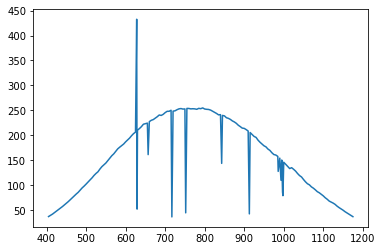

In [243]:
plt.plot(df2)
plt.savefig('tootlikkus.png', dpi=200)

In [244]:
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func1(x, a, b, c):
    return a*x**2+b*x+c

def func2(x, a, b, c):
    return a*x**3+b*x+c

def func3(x, a, b, c):
    return a*x**3+b*x**2+c

def func4(x, a, b, c):
    return a*exp(b*x)+c

In [245]:
df2.head(5)

,radiation_flux
time_m,
405,36.775197
410,39.171480
415,41.677255
420,44.652742
425,47.490524


In [246]:
df2 = df2.astype(np.float64)
df2.head(5)
x = np.array(df2.index.astype(np.float64).tolist())
y = np.array(df2['radiation_flux'].astype(np.float64).tolist())
params, covs = curve_fit(func1, x, y)

In [247]:
x

array([ 405.,  410.,  415.,  420.,  425.,  430.,  435.,  440.,  445.,
        450.,  455.,  460.,  465.,  470.,  475.,  480.,  485.,  490.,
        495.,  500.,  505.,  510.,  515.,  520.,  525.,  530.,  535.,
        540.,  545.,  550.,  555.,  560.,  565.,  570.,  575.,  580.,
        585.,  590.,  595.,  600.,  605.,  610.,  615.,  620.,  625.,
        628.,  629.,  630.,  635.,  640.,  645.,  650.,  655.,  657.,
        660.,  665.,  670.,  675.,  680.,  685.,  690.,  695.,  700.,
        705.,  710.,  715.,  717.,  720.,  725.,  730.,  735.,  740.,
        745.,  750.,  752.,  755.,  760.,  765.,  770.,  775.,  780.,
        785.,  790.,  795.,  800.,  805.,  810.,  815.,  820.,  825.,
        830.,  835.,  840.,  843.,  845.,  850.,  855.,  860.,  865.,
        870.,  875.,  880.,  885.,  890.,  895.,  900.,  905.,  910.,
        913.,  915.,  920.,  925.,  930.,  935.,  940.,  945.,  950.,
        955.,  960.,  965.,  970.,  975.,  980.,  985.,  986.,  990.,
        993.,  995.,

In [248]:
params

array([-1.48276795e-03,  2.30828074e+00, -6.67733141e+02])

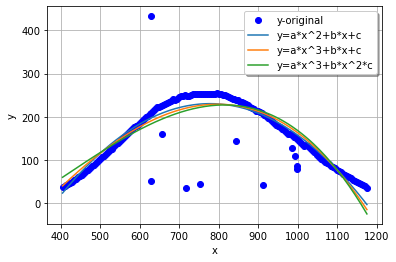

In [249]:
params, _ = curve_fit(func1, x, y)
a, b, c = params[0], params[1], params[2]
yfit1 = a*x**2+b*x+c

params, _  = curve_fit(func2, x, y)
a, b, c = params[0], params[1], params[2]
yfit2 = a*x**3+b*x+c

params, _  = curve_fit(func3, x, y)
a, b, c = params[0], params[1], params[2]
yfit3 = a*x**3+b*x**2+c




plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.plot(x, yfit2, label="y=a*x^3+b*x+c")
plt.plot(x, yfit3, label="y=a*x^3+b*x^2*c")

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()


In [250]:
y

array([ 36.77519707,  39.17147967,  41.67725544,  44.65274248,
        47.4905241 ,  50.45827892,  53.47315547,  56.71640611,
        60.09001801,  63.24279089,  66.78966955,  70.57857202,
        74.27513906,  78.06871863,  81.91723255,  85.36508618,
        89.82489151,  94.21769636,  97.87765858, 101.87625767,
       106.21341206, 110.25435088, 114.38076807, 119.19325244,
       123.19754835, 126.5484172 , 132.10989396, 136.89974059,
       140.40187403, 144.15231771, 149.13873983, 154.1691453 ,
       158.81195321, 162.57955974, 167.6628316 , 172.55172772,
       175.93822023, 179.00580393, 182.26396578, 186.65490107,
       190.36562372, 194.1991738 , 198.95999202, 203.1199907 ,
       206.13283707, 432.632889  ,  51.72557197, 210.08269741,
       213.34718582, 217.19785758, 221.99268024, 223.09852339,
       224.21832279, 161.00631021, 227.24602458, 229.90590328,
       231.33849607, 234.21378762, 237.05747494, 240.53216983,
       239.64162896, 241.79936553, 245.26457659, 247.90

C:\Users\martt\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


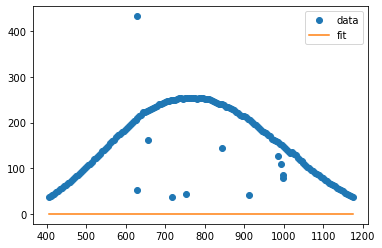

In [251]:
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

parameters, covariance = curve_fit(Gauss, x, y)

fit_A = parameters[0]
fit_B = parameters[1]

fit_y = Gauss(x, fit_A, fit_B)
plt.plot(x, y, 'o', label='data')
plt.plot(x, fit_y, '-', label='fit')
plt.legend()

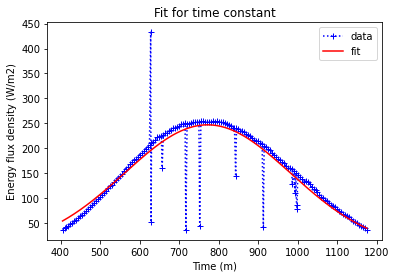

In [255]:
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])

plt.plot(x, y, 'b+:', label='data')
plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('Fit for time constant')
plt.xlabel('Time (m)')
plt.ylabel('Energy flux density (W/m2)')
plt.savefig('gaussian1.png', dpi=200)
plt.show()

In [253]:
popt


array([246.89061461, 771.82694524, 210.3707404 ])

In [254]:
pcov


array([[ 26.29002741,   0.80122283, -18.62338863],
       [  0.80122283,  25.91445865,  -2.17061463],
       [-18.62338863,  -2.17061463,  34.65869116]])